### Importing libraries and data

In [31]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
%matplotlib inline

In [33]:
# Define path 
path = r'C:\Users\harip\Desktop\Data Analytics Project\Advanced Analytics & Dashboard Design\Exercise 6.4'

In [34]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','clean_data.csv'), index_col = 0)

In [35]:
df.head()

,Company,Specific Bean Origin,REF,Review,Cacao percent,Location,Rating,Bean type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Unknown,Peru


### Visual Exploration: Scatter plot

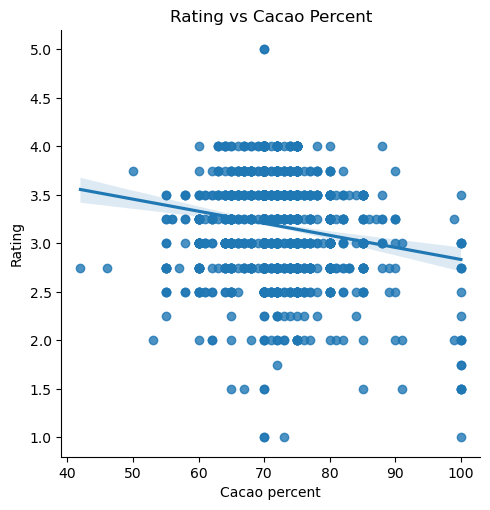

In [45]:
sns.lmplot(data=df, x='Cacao percent', y='Rating')
plt.title('Rating vs Cacao Percent')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','scatterplot.png'))
plt.show()

### Hypothesis 
There is a significant relationship between cacao percentage and chocolate rating. Specifically, as cacao percentage increases, the chocolate rating is expected to decrease slightly, reflecting the increased bitterness of higher-cacao chocolate.

In [37]:
# Reshape the variables
X = df['Cacao percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [38]:
X

array([[63],
       [70],
       [70],
       ...,
       [65],
       [62],
       [65]])

In [39]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Regression Analysis

In [40]:
# Create a regression object
regression = LinearRegression()

In [41]:
# Fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

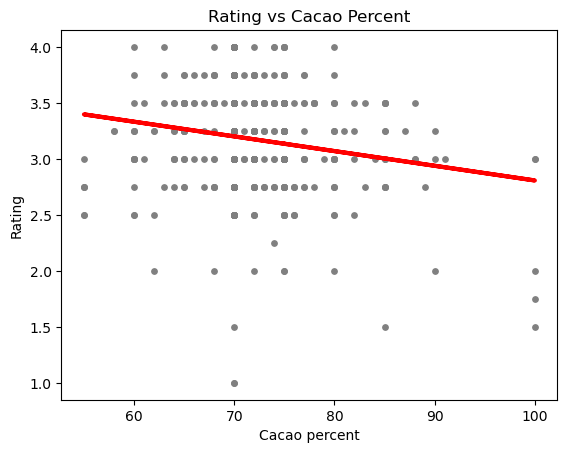

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Cacao Percent')
plot_test.xlabel('Cacao percent')
plot_test.ylabel('Rating')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Regression.png'))
plot_test.show()

### Interpretation of Regression Line Fit

The regression line shows a slight negative trend between cacao percentage and chocolate rating. While the line slopes downward, indicating that higher cacao percentages are generally associated with slightly lower ratings, the data points are widely scattered around the line. This suggests that cacao percentage alone is not a strong predictor of chocolate ratings, and other factors (such as bean type, company, or origin) may also play an important role.

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0131153]]
Mean squared error:  0.2095475343188044
R2 score:  0.018051898086671292


In [49]:
y_predicted

array([[3.13549466],
       [3.17484055],
       [3.20107115],
       [3.20107115],
       [3.06991817],
       [3.39780062],
       [3.20107115],
       [3.13549466],
       [3.25353234],
       [3.26664764],
       [3.27976294],
       [3.20107115],
       [3.26664764],
       [3.20107115],
       [3.13549466],
       [3.06991817],
       [3.00434168],
       [3.17484055],
       [3.20107115],
       [3.20107115],
       [3.20107115],
       [3.16172525],
       [3.39780062],
       [2.80761221],
       [3.33222413],
       [3.13549466],
       [3.13549466],
       [3.22730175],
       [3.20107115],
       [3.22730175],
       [3.17484055],
       [3.20107115],
       [3.20107115],
       [3.20107115],
       [3.13549466],
       [3.20107115],
       [3.17484055],
       [3.27976294],
       [3.17484055],
       [3.20107115],
       [3.13549466],
       [3.26664764],
       [3.20107115],
       [3.39780062],
       [3.20107115],
       [3.33222413],
       [3.10926406],
       [3.135

### Compare Predicted vs Actual in DataFrame

In [54]:
results = pd.DataFrame({
    'Actual Rating': y_test.ravel(),
    'Predicted Rating': y_predicted.ravel(),
    'Residuals': (y_test.ravel() - y_predicted.ravel())
})

print(results.head(10))

   Actual Rating  Predicted Rating  Residuals
0           2.50          3.135495  -0.635495
1           2.75          3.174841  -0.424841
2           2.50          3.201071  -0.701071
3           3.25          3.201071   0.048929
4           3.25          3.069918   0.180082
5           2.75          3.397801  -0.647801
6           3.50          3.201071   0.298929
7           2.50          3.135495  -0.635495
8           3.50          3.253532   0.246468
9           3.50          3.266648   0.233352


### Model Performance Reflection

The model’s R2 score is relatively low, meaning that cacao percentage explains only a small portion of the variation in chocolate ratings. The MSE also indicates that there is some error between predicted and actual values. This reinforces the visual interpretation: cacao percentage has some influence on ratings, but it is not the sole determining factor.

On the test set, the predicted values are fairly close to the actual ratings in some cases, but there is noticeable variation. This suggests that the model has limited predictive power when only using cacao percentage.

### Reflections on Data Bias

It is possible that bias exists in the dataset. For example, ratings may be influenced by subjective preferences of reviewers, company reputation, or geographical factors not captured in the analysis. Additionally, the dataset may have more chocolates from certain regions or companies, skewing the overall results. This bias can reduce the generalizability of the model and limit its ability to accurately capture consumer preferences across the global chocolate market.